# Simulation du jeux de LIDO simplifié

## Principe
On considére un jeux de Lido simple:
on dispose d'un un seul pion.

- Etape 0 :
Le pion doit sort de sa prison lorsqu'on obtient un 6.

- Etape 1 :
Le pion doit atteindre exactement une position cible situé à N pas de distance de sa prison 

Soit $X_n$ la variable aléatoire qui represente le nombre de coup nécéssaire pour atteindre la positions cible.

**Objectif 1** : Simuler le jeux 

**Objectif 2** : Calculer une estimation de l'éspérance mathématique de $X_n$ en utilisant `python`

**Objéctif 3** : Observer la variation de $\mathbb{E}(X_n)$ en fonction de $n$

<img src="LIDO.png">


In [2]:
import numpy as np

### Simulation du lancé de dé

In [3]:
def Roll():
    """simulation d'un seul lancé de dé parfait"""
    return int(np.random.choice(range(1,7),1))

In [4]:
Roll.__doc__

"simulation d'un seul lancé de dé parfait"

In [5]:
for i in range(10):
    print(Roll())

6
3
2
1
4
4
5
3
4
5


### Compléter le code et commenter

In [6]:
#    mon code
A=0
NA=0
S=10
c=0
print("\t\t\t WELCOME TO THE GAME   START ROLLING \t\t\t")
temp=Roll()
NA+=1
print("you got",temp)
while (temp!=6):
    temp=Roll()
    print("you got",temp)
    NA+=1
A=1
print("Congrats!,you got out of prison")
while (A<S) :
    temp=Roll()
    print("you got",temp)
    if temp+A<S:
        NA+=1
        A+=temp
        print("you are now in position",A)
    elif temp+A>S:
        print("Roll again!")
        NA+=1
    else:
        A=S
        NA+=1
        print("you are now in position",A,"\n\t\t\t GAME OVER   YOU WON \t\t\t\n Number of rolls:",NA)   

			 WELCOME TO THE GAME   START ROLLING 			
you got 3
you got 6
Congrats!,you got out of prison
you got 4
you are now in position 5
you got 4
you are now in position 9
you got 1
you are now in position 10 
			 GAME OVER   YOU WON 			
 Number of rolls: 5


### Simulation
Ecrire une foction `sim` qui simule le jeux et qui prend comme variable le nombre de pas $n$ nécessazire pour atteindre la cible

In [7]:
def sim(S):
    A=0
    NA=0
    S=10
    c=0
    temp=Roll()
    NA+=1
    while temp!=6:
        temp=Roll()
        NA+=1
    A=1
    while (A<S) :
        temp=Roll()
        if temp+A<S:
            NA+=1
            A+=temp
        elif temp+A>S:
            NA+=1
        else:
            A=S
            NA+=1
    return NA

In [8]:
sim(30)

5

In [73]:
N=1000
sim(100)
l=[sim(10) for i in range(N)]  
sum(l)/N   

13.555

### Simulation de $10^5$  scénario 

In [63]:
Freq=np.fromiter((sim(20) for i in range(10**2)),dtype=int)

In [64]:
ESP=Freq.sum()/10**2 

In [65]:
x=list(range(10,20)) 
y=[np.fromiter((sim(u) for i in range(5*10**2)),dtype=int).sum()/100 for u in x]

In [66]:
import matplotlib.pyplot as plt

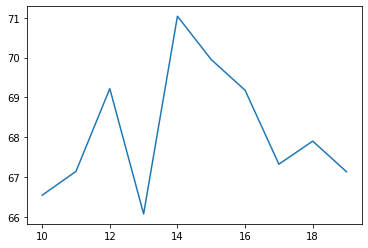

In [67]:
plt.plot(x,y)

In [68]:
from scipy import stats
import numpy as np
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

In [69]:
slope

0.05678787878787848

In [70]:
intercept

67.32557575757576

In [71]:
yy=[slope *u +intercept for u in x]

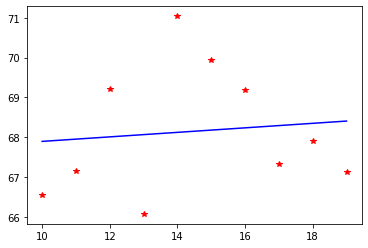

In [72]:
plt.plot(x,y,'*r',x,yy,'-b')
plt.show()